# Using `scipy` statistics

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
np.set_printoptions(precision=3)

In [4]:
plt.style.use('seaborn-notebook')

## Random number generators

### Create a distribution object

In [5]:
d = stats.norm()

In [6]:
d.mean(), d.std(), d.var()

(0.0, 1.0, 1.0)

#### Get random variables

Compare with `rnorm` in R

In [7]:
d.rvs(10)

array([ 1.07 , -0.339, -0.282,  0.743,  0.14 ,  0.551, -1.779, -0.496,
        1.339, -2.516])

#### Get PDF

Compare with `dnorm` in R

In [8]:
x = np.linspace(-3,3,100)

In [9]:
y = d.pdf(x)

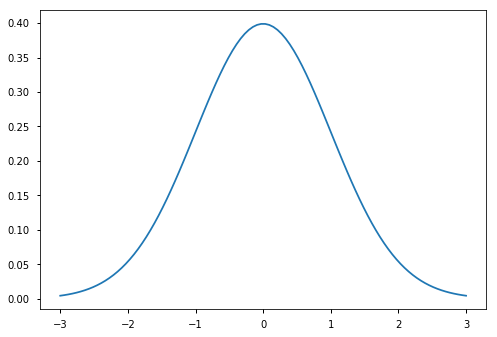

In [10]:
plt.plot(x, y)
pass

### Get CDF

Compare with `pnrom` in R

In [11]:
y = d.cdf(x)

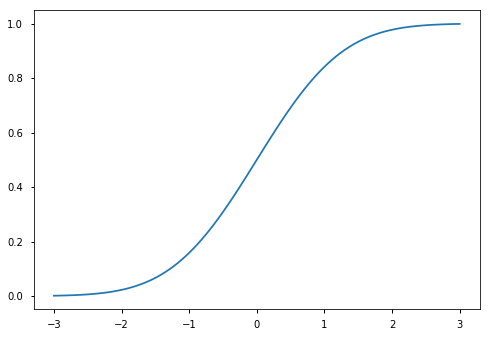

In [12]:
plt.plot(x, y)
pass

### Get percentiles 

Compare with `qnorm` in R. This is the inverse CDF function.

In [13]:
xp = d.ppf(y)

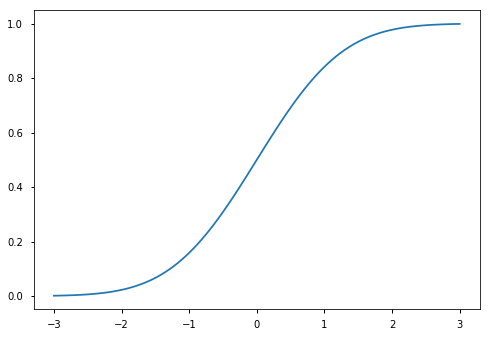

In [14]:
plt.plot(xp, y)
pass

## Example

**1**. Assume IQ has a normal distribution. Suppose the average IQ of a Duke student is 130, with a standard deviation of 13. 

- Make a plot of the distribution of IQs between 70 and 190.

In [15]:
d = stats.norm(loc=130, scale=13)

In [16]:
iqs = np.linspace(70, 190, 100)

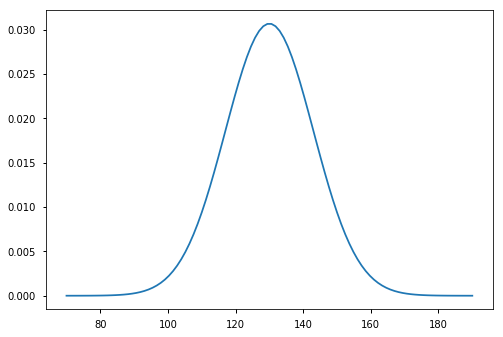

In [17]:
plt.plot(iqs, d.pdf(iqs))
pass

- What IQ do you need to be in the top 10 percentile?

In [18]:
d.ppf(0.9)

146.6601703520798

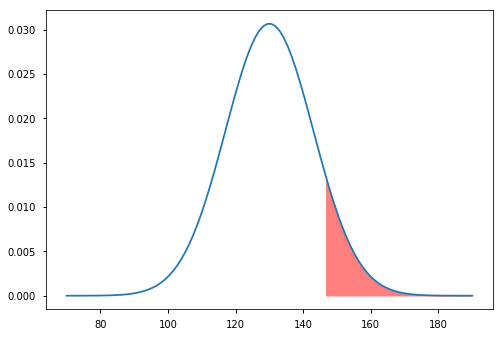

In [32]:
xp = np.linspace(d.ppf(0.9), 190, 100)
y1 = np.zeros_like(xp)
y2 = d.pdf(xp)
plt.plot(iqs, d.pdf(iqs))
plt.fill_between(xp, y1, y2, color='red', alpha=0.5)
pass

- What fraction of Duke students have IQs between 100 and 130?

In [19]:
d.cdf(130) - d.cdf(100)

0.48949187188624066

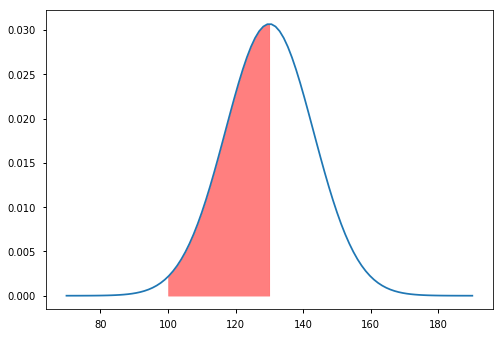

In [33]:
xp = np.linspace(100, 130, 100)
y1 = np.zeros_like(xp)
y2 = d.pdf(xp)
plt.plot(iqs, d.pdf(iqs))
plt.fill_between(xp, y1, y2, color='red', alpha=0.5)
pass

- What percentile would you be if your IQ was 150?

In [20]:
d.cdf(150)

0.93803209716362879

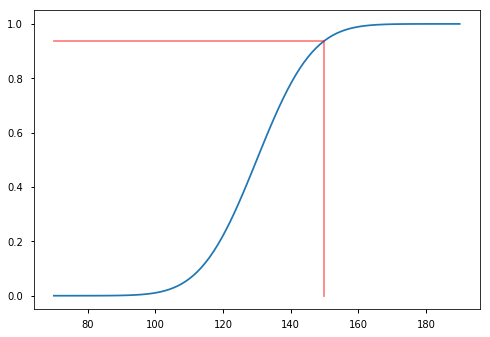

In [40]:
xs = 70, 150, 150
ys = d.cdf(150), d.cdf(150), 0
plt.plot(iqs, d.cdf(iqs))
plt.plot(xs, ys, color='red', alpha=0.5)
pass

## Using simulation

Simulate IQs of 1 million students.

In [21]:
n = int(1e6)
data = d.rvs(n)

- What IQ do you need to be in the top 10 percentile?

In [22]:
data.sort()
data[int(0.9 * n)]

146.65479002172754

- What fraction of Duke students have IQs between 100 and 130?

In [23]:
((data < 130).sum() - (data < 100).sum())/n

0.490008

- What percentile would you be if your IQ was 150?

In [24]:
(data < 150).sum()/n

0.93808499999999995

## Estimating parameters

In [86]:
n = 50
mu_ = 100
sd_ = 15
d_ = stats.norm(mu_, sd_)
xs = d_.rvs(n)

In [65]:
mu, sd = stats.norm.fit(xs)
d = stats.norm(mu, sd)

In [76]:
d1 = stats.norm(mu, sd/np.sqrt(n))
ci = d1.interval(0.95)

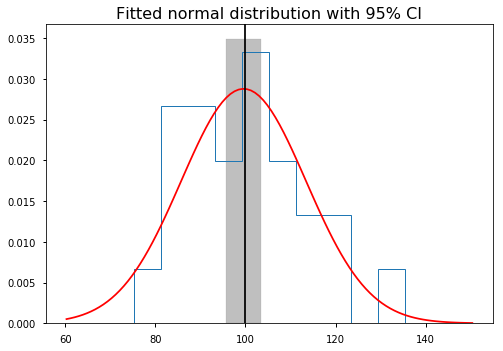

In [106]:
plt.hist(xs, normed=True, histtype='step', linewidth=1)
xp = np.linspace(xs.min() - sd_, xs.max() + sd_, 100)
yp = d.pdf(xp)
plt.plot(xp, yp, color='red')
plt.axvline(mu, color='black')
ymin, ymax = plt.ylim()
plt.fill_between(ci, ymin, ymax, color='grey', alpha=0.5)
plt.title('Fitted normal distribution with 95% CI',
         fontsize=16)
pass